### Load Python Libraries

In [128]:
# Load libraries
import numpy
import pandas
import pickle
import seaborn as sns
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
%matplotlib inline

### Load the Gastric Cancer Dataset

In [109]:
dataset_full = read_csv("./covariate_genome_freq_table_nonMSI_prefiltered.csv")

In [110]:
del dataset_full['Unnamed: 0']
dataset_full.tail()

,local_mutrate,mean_rep_time,H3K4Me1_tumor,H3K36me3_E111,H3K4me3_E094,DNase_E094,H3K27me3_E094,H3K9me3_E111,H2BK15ac_meta,H3K4me2_meta,...,SMC3,threeMer,oneMer,threeRight,threeLeft,fiveRight,fiveLeft,sites.sid,mut.count,nonmut.count
30655595,0.000013,57.746571,0,0,0,0,1,0,0,0,...,0,AAC,A,0,AA,0,0,TCGA-HU-8245,0,1
30655596,0.000013,57.746571,0,0,0,0,1,0,0,0,...,0,AAC,A,0,AA,0,0,TCGA-HU-8608,0,1
30655597,0.000013,57.746571,0,0,0,0,1,0,0,0,...,0,AAC,A,0,AA,0,0,TCGA-HU-A4G6,0,1
30655598,0.000013,57.746571,0,0,0,0,1,0,0,0,...,0,AAC,A,0,AA,0,0,TCGA-HU-A4H0,0,1
30655599,0.000013,57.746571,0,0,0,0,1,0,0,0,...,0,AAC,A,0,AA,0,0,TCGA-IN-7806,0,1


In [111]:
# shape
dataset_full.shape

(30655600, 24)

### Check if NaN exists

In [ ]:
dataset_full.isnull().sum()

There is no NaN feed within the entire data. No preprocessing for NaN is required.

### Explore how many categories/values each feature takes.

In [45]:
# List up Multiclass string values and its count
for i, v in enumerate(dataset_full.columns):
    print(v + " has " + str(len(dataset_full.groupby(v))) + " categories.")
    print(dataset_full.groupby(v).size())
    print()

local_mutrate has 10 categories.
local_mutrate
2.975448e-07    3237868
1.789195e-06    4320156
2.195768e-06    4234521
2.572523e-06    4500595
3.065660e-06    4221027
3.871655e-06    3565530
5.184622e-06    2657972
7.259739e-06    1791242
9.832329e-06    1252174
1.311345e-05     874515
dtype: int64

mean_rep_time has 8 categories.
mean_rep_time
11.515981    1117061
23.354280    2258861
32.559997    3390281
41.701398    3716213
49.967968    4337975
57.746571    4718229
65.321197    5053849
73.466195    6063131
dtype: int64

H3K4Me1_tumor has 2 categories.
H3K4Me1_tumor
0    23536304
1     7119296
dtype: int64

H3K36me3_E111 has 2 categories.
H3K36me3_E111
0    25995153
1     4660447
dtype: int64

H3K4me3_E094 has 2 categories.
H3K4me3_E094
0    19309914
1    11345686
dtype: int64

DNase_E094 has 2 categories.
DNase_E094
0    19295382
1    11360218
dtype: int64

H3K27me3_E094 has 2 categories.
H3K27me3_E094
0    27510633
1     3144967
dtype: int64

H3K9me3_E111 has 2 categories.
H3K9me3_

In [ ]:
# box and whisker plots
dataset_full.plot(kind='box', subplots=True, sharex=False, sharey=False)
pyplot.show()

In [ ]:
# histograms
dataset_full.hist()
pyplot.show()

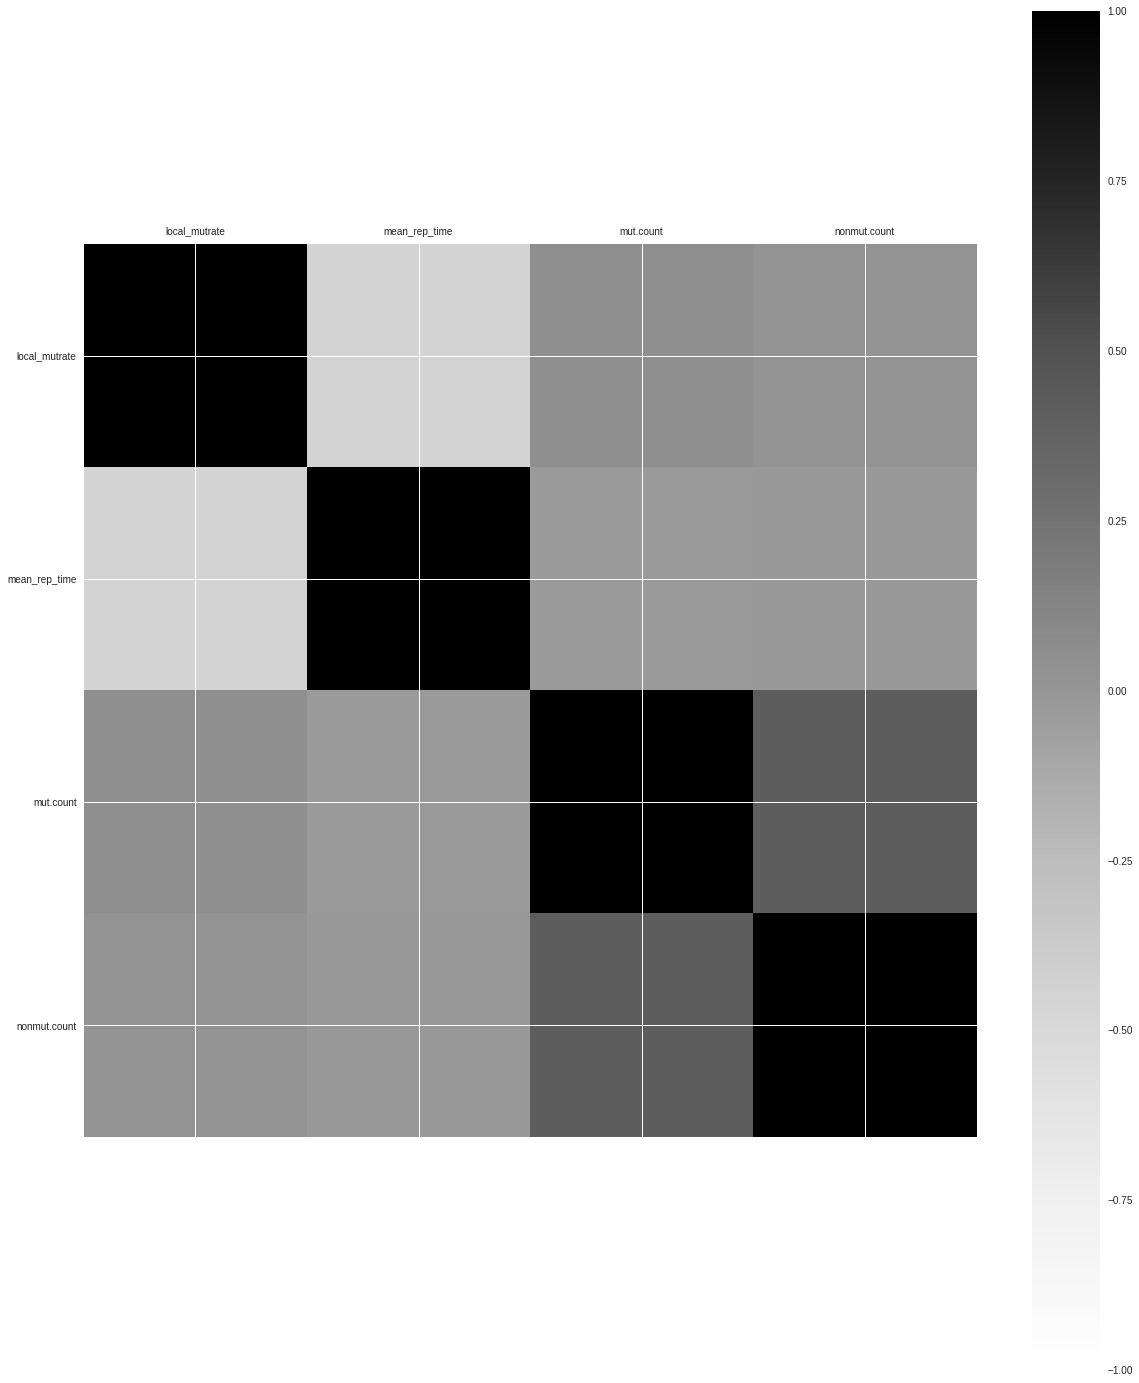

In [53]:
names = ['local_mutrate', 'mean_rep_time', 'mut.count', 'nonmut.count']

correlations = dataset_full[names].corr()
# plot correlation matrix
fig = pyplot.figure(figsize=(20, 25))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [56]:
# scatter plot matrix - takes too much time...
#scatter_matrix(dataset_full[names])
#pyplot.show()

KeyboardInterrupt: 

### Combine mut.count and nonmut.count into one column...

In [20]:
# Quick check if rows are mutually exclusivelly filled by 0 and 1.
randix= np.random.randint(1, dataset_full.shape[0], size=1000)
dataset_full[['mut.count', 'nonmut.count']].iloc[randix]

,mut.count,nonmut.count
27982585,0,24
20720398,0,70
18622341,0,1
18769174,0,1
1792016,0,18
11805432,0,2
22574957,0,2
9249185,0,1
20963672,0,20
15555553,0,3


Expected that nonmut.count has only 0 or 1 for its value but seems many integers exist. Clarification of these numbers are required to perform precise analysis.
I'll just omit 'nonmut.count' at this moment...

In [112]:
mut_count = pd.DataFrame
sites_sid = pd.DataFrame

mut_count = dataset_full['mut.count']
sites_sid = dataset_full['sites.sid']

dataset = dataset_full.drop(['mut.count', 'nonmut.count', 'sites.sid'], axis=1)
dataset.dtypes

local_mutrate    float64
mean_rep_time    float64
H3K4Me1_tumor      int64
H3K36me3_E111      int64
H3K4me3_E094       int64
DNase_E094         int64
H3K27me3_E094      int64
H3K9me3_E111       int64
H2BK15ac_meta      int64
H3K4me2_meta       int64
H3K79me1_meta      int64
H3T11ph_meta       int64
CTCF               int64
H3K23ac_meta       int64
SMC3               int64
threeMer          object
oneMer            object
threeRight        object
threeLeft         object
fiveRight         object
fiveLeft          object
dtype: object

In [113]:
dataset.shape

(30655600, 21)

### Use mut.count for binary classification target...

In [115]:
# Binarize mut.count

binarizer = Binarizer(threshold=0.0).fit(mut_count)
mut_count_enc = binarizer.transform(mut_count)
mut_count_enc = pd.DataFrame(mut_count_enc.T, columns=["mut_count_enc"])

/home/suns1/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/suns1/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [116]:
# LabelEncode sites.sid

mlb = LabelEncoder()
sites_sid_enc = mlb.fit_transform(sites_sid)
sites_sid_enc = pd.DataFrame(sites_sid_enc.T, columns=["sites_sid_enc"])
sites_sid_enc.tail()

,sites_sid_enc
30655595,135
30655596,136
30655597,137
30655598,138
30655599,139


In [117]:
# OneHotEncode
dataset_onehot = pd.get_dummies(dataset, prefix=['threeMer', 'oneMer', 'threeRight', 'threeLeft', 'fiveRight', 'fiveLeft'])
dataset_onehot.shape

(30655600, 34)

In [118]:
#del dataset
dataset = pd.concat([dataset_onehot, sites_sid_enc, mut_count_enc], axis=1)
dataset.tail()

,local_mutrate,mean_rep_time,H3K4Me1_tumor,H3K36me3_E111,H3K4me3_E094,DNase_E094,H3K27me3_E094,H3K9me3_E111,H2BK15ac_meta,H3K4me2_meta,...,fiveRight_0,fiveRight_AAG,fiveRight_AGA,fiveRight_AGT,fiveLeft_0,fiveLeft_AAG,fiveLeft_TAA,fiveLeft_TTG,sites_sid_enc,mut_count_enc
30655595,0.000013,57.746571,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,135,0
30655596,0.000013,57.746571,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,136,0
30655597,0.000013,57.746571,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,137,0
30655598,0.000013,57.746571,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,138,0
30655599,0.000013,57.746571,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,139,0


### Convert String values into Integer

In [100]:
# types
dataset.dtypes

local_mutrate    float64
mean_rep_time    float64
H3K4Me1_tumor      int64
H3K36me3_E111      int64
H3K4me3_E094       int64
DNase_E094         int64
H3K27me3_E094      int64
H3K9me3_E111       int64
H2BK15ac_meta      int64
H3K4me2_meta       int64
H3K79me1_meta      int64
H3T11ph_meta       int64
CTCF               int64
H3K23ac_meta       int64
SMC3               int64
threeMer_0         uint8
threeMer_AAC       uint8
threeMer_AAG       uint8
oneMer_0           uint8
oneMer_A           uint8
threeRight_0       uint8
threeRight_GA      uint8
threeLeft_0        uint8
threeLeft_AA       uint8
threeLeft_CA       uint8
threeLeft_CG       uint8
fiveRight_0        uint8
fiveRight_AAG      uint8
fiveRight_AGA      uint8
fiveRight_AGT      uint8
fiveLeft_0         uint8
fiveLeft_AAG       uint8
fiveLeft_TAA       uint8
fiveLeft_TTG       uint8
sites_sid_enc      int64
mut_count_enc      int64
dtype: object

In [104]:
# List up Multiclass string values and its count
for i, v in enumerate(dataset.columns):
    print(v + " has " + str(len(dataset.groupby(v))) + " categories.")
    print(dataset.groupby(v).size())
    print()

local_mutrate has 10 categories.
local_mutrate
2.975448e-07    1114
1.789195e-06    1399
2.195768e-06    1389
2.572523e-06    1480
3.065660e-06    1404
3.871655e-06    1106
5.184622e-06     859
7.259739e-06     555
9.832329e-06     418
1.311345e-05     276
dtype: int64

mean_rep_time has 8 categories.
mean_rep_time
11.515981     371
23.354280     718
32.559997    1082
41.701398    1224
49.967968    1404
57.746571    1543
65.321197    1621
73.466195    2037
dtype: int64

H3K4Me1_tumor has 2 categories.
H3K4Me1_tumor
0    7636
1    2364
dtype: int64

H3K36me3_E111 has 2 categories.
H3K36me3_E111
0    8466
1    1534
dtype: int64

H3K4me3_E094 has 2 categories.
H3K4me3_E094
0    6337
1    3663
dtype: int64

DNase_E094 has 2 categories.
DNase_E094
0    6187
1    3813
dtype: int64

H3K27me3_E094 has 2 categories.
H3K27me3_E094
0    8955
1    1045
dtype: int64

H3K9me3_E111 has 2 categories.
H3K9me3_E111
0    8999
1    1001
dtype: int64

H2BK15ac_meta has 2 categories.
H2BK15ac_meta
0    9511

In [46]:
with open('dataset_onehot.pickle', 'wb') as f:
    pickle.dump(dataset_onehot, f)

### Prepare Training and Validation Data

In [23]:
with open('dataset_onehot.pickle', 'rb') as f:
    dataset = pickle.load(f)

In [105]:
dataset.tail()

,local_mutrate,mean_rep_time,H3K4Me1_tumor,H3K36me3_E111,H3K4me3_E094,DNase_E094,H3K27me3_E094,H3K9me3_E111,H2BK15ac_meta,H3K4me2_meta,...,fiveRight_0,fiveRight_AAG,fiveRight_AGA,fiveRight_AGT,fiveLeft_0,fiveLeft_AAG,fiveLeft_TAA,fiveLeft_TTG,sites_sid_enc,mut_count_enc
7390579,1.789195e-06,73.466195,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
10909413,2.195768e-06,73.466195,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,14,0
11987222,2.572523e-06,23.354280,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,33,0
27683453,7.259739e-06,41.701398,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,133,0
2370571,2.975448e-07,73.466195,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,160,0


In [10]:
#dataset_onehot.isnull().sum()

In [119]:
seed = 7
np.random.seed(seed=seed)
rand_ix=np.random.randint(1, dataset.shape[0], size=10000)

In [145]:
# Split-out validation dataset
#dataset = dataset.values
input_dim = dataset.shape[1] - 1

# Use Entire Data
X = dataset[:, 0:input_dim]
Y = dataset[:, input_dim]

# Only Partial Data
#X = dataset[rand_ix, 0:input_dim]
#Y = dataset[rand_ix, input_dim]

validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=7)

### Evaluate Algorithms

In [121]:
# Test options and evaluation metric
num_folds = 5
seed = 7
scoring = 'accuracy'

LR: 0.993250 (0.001146)


/home/suns1/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/suns1/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/suns1/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/suns1/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/suns1/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA: 0.993000 (0.001000)
KNN: 0.992875 (0.001016)
CART: 0.987875 (0.002187)
NB: 0.797250 (0.028654)
SVM: 0.993250 (0.001146)


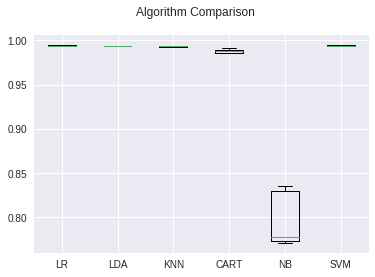

In [122]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [140]:
def plot_learning_curve(history):    
    pyplot.plot(history.history['loss'])
    pyplot.plot(history.history['val_loss'])
    pyplot.title('model loss - Accuracy')
    pyplot.ylabel('loss')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'validation'], loc='upper right')
    pyplot.show()

# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(input_dim, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(input_dim, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# define wider model
def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

def more_larger_model():
	# create model
	model = Sequential()
	model.add(Dense(input_dim, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
	model.add(Dense(64, kernel_initializer='normal', activation='relu'))
	model.add(Dense(32, kernel_initializer='normal', activation='relu'))
	model.add(Dense(8, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
epochs=2000
batch_size=1024
verbose=0

models = []

models.append(('FFNN', KerasClassifier(build_fn=baseline_model, epochs=epochs, batch_size=batch_size, verbose=verbose)))
models.append(('LargerNN', KerasClassifier(build_fn=larger_model, epochs=epochs, batch_size=batch_size, verbose=verbose)))
models.append(('WiderNN', KerasClassifier(build_fn=wider_model, epochs=epochs, batch_size=batch_size, verbose=verbose)))
models.append(('MLargerNN', KerasClassifier(build_fn=more_larger_model, epochs=epochs, batch_size=batch_size, verbose=verbose)))

histories = []

# evaluate each model in turn
for name, model in models:
    histories.append(model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation)))
    plot_learning_curve(histories[name])